In [1]:
!pip3 install torch==1.10.2+cpu torchvision==0.11.3+cpu torchaudio==0.10.2+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html
import numpy as np
import matplotlib.pyplot as plt
import torch

Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html


## Linear Regression

Using the rent prices from appartments in Lausanne from PW 02, restricting to the feature living area.

### Load Data

In [2]:
import pandas as pd
df = pd.read_csv("./lausanne-appart.csv")
N  = df.shape[0]
df.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


### Normalization

In [3]:
x0 = df.values[:,0]
x = (x0-np.mean(x0))/np.std(x0)
y0 = df.values[:,2]
y = (y0-np.mean(y0))/np.std(y0)

Text(0, 0.5, 'rent_price')

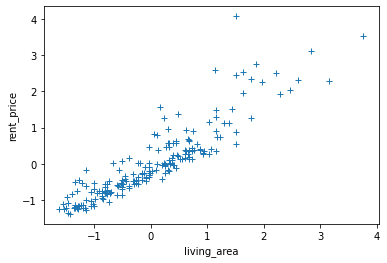

In [4]:
plt.plot(x, y,"+")
plt.xlabel("living_area")
plt.ylabel("rent_price")

### Linear Model, Normal Equations and Solution

We denote the observed rent by $y_j$ (at time $x_j$) and the model rent by $\hat{y}_j$ we assume 

$\qquad \hat{y}_j = \alpha + \beta x_j$

By minimizing the mean squares error

$\qquad C = \frac{1}{2N}\sum_j \left(y_j-\hat{y}_j\right)^2 = C(\alpha,\beta)$

we can fit the straigth line as follows by using the design matrix $X$ and the data vector $Y$, defined by 

$\qquad X = \left(\begin{array}{cc} 1 & x_0 \\ 1 & x_1 \\ \vdots & \vdots \\ 1 & x_{N-1}\end{array}\right), \qquad Y = \left(\begin{array}{c} y_0\\ \vdots \\ y_{N-1}\end{array}\right)$

We find 

$\qquad \left(\begin{array}{c}\alpha \\ \beta\end{array}\right) = \left(X^T\cdot X\right)^{-1}\cdot X^T\cdot Y$

Hence, here we can easily compute the (linear) model which best fits the training data in the sense of obtaining a minimal mean square error. 

### Solution of Normal Equations in Pytorch

tensor([[-1.9602e-16],
        [ 9.0425e-01]], dtype=torch.float64)


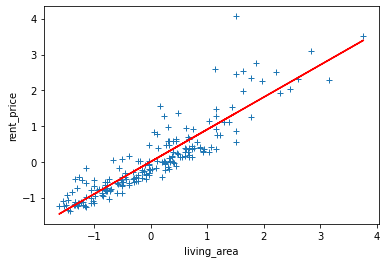

In [27]:
N = x.size

# YOUR CODE (START)
# compose torch tensors X,Y of shape (N,2) and (N,1) respectively
X = torch.cat((torch.ones(N, 1), torch.tensor(x).reshape(-1,1)), dim=1)
Y = torch.tensor(y).reshape(-1, 1)

# solution of normal equations, 'a' a torch tensor of shape (2,1) that contains parameters alpha and beta, which shall be optimized
a = torch.inverse(X.T@X)@X.T@Y
# a = torch.linalg.lstsq(Y, X).solution

# # prediction
Yhat = X@a

# YOUR CODE (END)

# plot
plt.plot(X[:,1],Y,"+")
plt.plot(X[:,1],Yhat,'r')
plt.xlabel("living_area")
plt.ylabel("rent_price")
print(a)

Note that with the pytorch function `torch.lstsq` you can obtain the same.

#### Cost
Defined as the following:

$\qquad C = \frac{1}{2N}\sum_j \left(y_j-\hat{y}_j\right)^2 = C(\alpha,\beta)$

In [28]:
def cost(X,Y,a):
    # YOUR CODE (START)
    return torch.sum(torch.pow(torch.sub(Y, X@a), 2))/(2*len(Y))
    # YOUR CODE (END)

In [29]:
cost_closed_form = cost(X,Y,a)
print(cost_closed_form)

tensor(0.0912, dtype=torch.float64)


### Gradient Descent

Specify the gradient of the cost (w.r.t. $\alpha, \beta$) here as maths expression.

In [30]:
def gradient_cost(X,Y,a):
    # YOUR CODE (START)
    N = len(X)
    x = X[:,1].reshape(-1,1)
    Yhat = (a[0] + a[1]*x)
    pda = torch.sum(-2*(Y - Yhat))/(2*N)
    pdb = torch.sum(-2*x*(Y - Yhat))/(2*N)
    return torch.tensor([[pda], [pdb]])
    # YOUR CODE (END)

tensor([[-9.5081e-17],
        [ 8.6125e-01]], dtype=torch.float64)


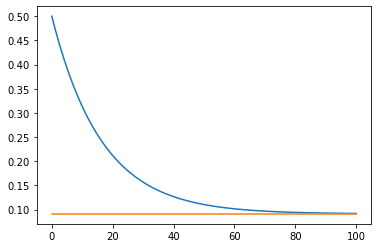

In [31]:
# adjust if needed
nepochs = 100
lr = 0.03

## initial parameter
a = torch.tensor([0.0,0.0], dtype=torch.float64).reshape(2,1)

# track the costs
costs = [cost(X,Y,a)]

# YOUR CODE (START)

# loop over the epochs: update parameter values, compute the cost and add it to the costs list
for epoch in range(nepochs):
    a = a - lr * gradient_cost(X,Y,a)
    costs.append(cost(X,Y,a))
print(a)
# YOUR CODE (END)
    
# some output
cost_gd = costs[-1]
plt.plot(range(nepochs+1),costs)
plt.plot(range(nepochs+1),cost_closed_form*torch.ones(nepochs+1))

### Different Learning Rates

Play with different learning rates: Explore for what learning rates 
- the learning is most efficient
- the learning yet works
- the learning does not work anymore (learning rate too large)

Explain the different scenarios.

`lr = 0.03` works quite well with 100 epochs

`lr = 0.1` is too steep

`lr = 0.01` does not work anymore

Text(0, 0.5, 'rent_price')

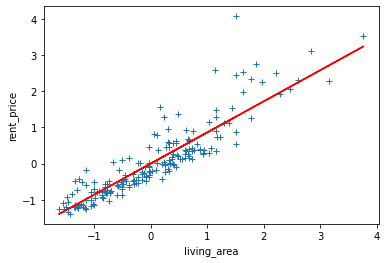

In [32]:
Yhat = X@a
plt.plot(X[:,1],Y,"+")
plt.plot(X[:,1],Yhat,'r')
plt.xlabel("living_area")
plt.ylabel("rent_price")